# Rareness

## Get All Functions from All Phases and Groups

In [1]:
import pandas as pd
import numpy as np
import collections

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

In [2]:
## List the 20,000 least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-20000-2:-1]
new_list = []
for x in range(0,len(list_functions)):
    new_list.append(list_functions[x][0])
new_list = list(filter(None, new_list))
len(new_list)

20000

## Functions Count for Group 0

In [3]:
import seaborn as sns
overall_45_group0 = overall_45.loc[overall_45['Group'] == 0]
overall_45_group0['functions'].replace('', np.nan, inplace=True)
overall_45_group0.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group0['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group0 = df.reset_index(drop=True)
df_group0

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Functions,Count
0,google.maps.Marker,136
1,google.maps.Map,132
2,document.getElementById,128
3,data.cityofchicago.org,93
4,google.maps.LatLng,78
...,...,...
12485,prototype.size,1
12486,prototype.empty,1
12487,prototype.each,1
12488,polyIn.exponent,1


In [4]:
# Get the Frequency at each Quantiles for Bogota 0 - No Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group0['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  1.0
Quantile: 0.10 Freq:  1.0
Quantile: 0.15 Freq:  1.0
Quantile: 0.20 Freq:  1.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  4.0
Quantile: 0.60 Freq:  4.0
Quantile: 0.65 Freq:  4.0
Quantile: 0.70 Freq:  4.0
Quantile: 0.75 Freq:  4.0
Quantile: 0.80 Freq:  5.0
Quantile: 0.85 Freq:  6.0
Quantile: 0.90 Freq:  6.0
Quantile: 0.95 Freq:  6.0


<AxesSubplot:>

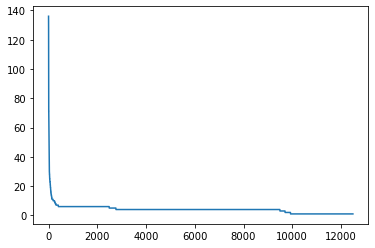

In [5]:
# Distribution Plot for frequency of each functions in the no tranparency group

df_group0['Count'].plot()

## Functions Count for Group 1

In [6]:
import seaborn as sns
overall_45_group1 = overall_45.loc[overall_45['Group'] == 1]
overall_45_group1['functions'].replace('', np.nan, inplace=True)
overall_45_group1.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group1['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group1 = df.reset_index(drop=True)
df_group1

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Functions,Count
0,google.maps.Map,159
1,google.maps.Marker,155
2,document.getElementById,143
3,data.cityofchicago.org,113
4,JSON.parse,101
...,...,...
132825,hawaii.translate,1
132826,alaska.translate,1
132827,hawaiiStream.polygonEnd,1
132828,alaskaStream.polygonEnd,1


In [7]:
# Get the Frequency at each Quantiles for Bogota 1 - Performance Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group1['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  2.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  2.0
Quantile: 0.20 Freq:  3.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  4.0
Quantile: 0.60 Freq:  4.0
Quantile: 0.65 Freq:  4.0
Quantile: 0.70 Freq:  4.0
Quantile: 0.75 Freq:  4.0
Quantile: 0.80 Freq:  4.0
Quantile: 0.85 Freq:  4.0
Quantile: 0.90 Freq:  8.0
Quantile: 0.95 Freq:  8.0


<AxesSubplot:>

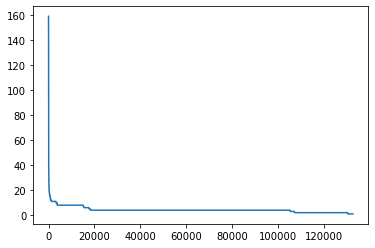

In [8]:
# Distribution Plot for frequency of each functions in the performance tranparency group

df_group1['Count'].plot()

## Functions Count for Group 2

In [9]:
import seaborn as sns
overall_45_group2 = overall_45.loc[overall_45['Group'] == 2]
overall_45_group2['functions'].replace('', np.nan, inplace=True)
overall_45_group2.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group2['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group2 = df.reset_index(drop=True)
df_group2

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Functions,Count
0,google.maps.Map,169
1,google.maps.Marker,165
2,document.getElementById,163
3,data.cityofchicago.org,113
4,.min.js,101
...,...,...
49797,rawData.filter,1
49798,labelException.indexOf,1
49799,labelException.push,1
49800,removed.length,1


In [10]:
# Get the Frequency at each Quantiles for Bogota 2 - Solution Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group2['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  1.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  2.0
Quantile: 0.20 Freq:  4.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  4.0
Quantile: 0.60 Freq:  4.0
Quantile: 0.65 Freq:  4.0
Quantile: 0.70 Freq:  4.0
Quantile: 0.75 Freq:  4.0
Quantile: 0.80 Freq:  4.0
Quantile: 0.85 Freq:  5.0
Quantile: 0.90 Freq:  6.0
Quantile: 0.95 Freq:  11.0


<AxesSubplot:>

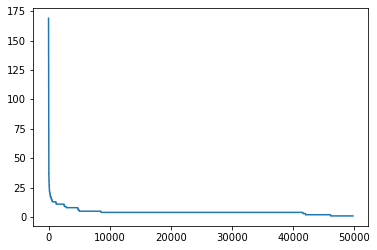

In [11]:
# Distribution Plot for frequency of each functions in the solution tranparency group

df_group2['Count'].plot()

## Functions Count for Group 3

In [12]:
import seaborn as sns
overall_45_group3 = overall_45.loc[overall_45['Group'] == 3]
overall_45_group3['functions'].replace('', np.nan, inplace=True)
overall_45_group3.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45_group3['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out1 = collections.Counter(x)
df = pd.DataFrame(list(out1.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_group3 = df.reset_index(drop=True)
df_group3

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Functions,Count
0,document.getElementById,175
1,google.maps.Map,160
2,google.maps.Marker,151
3,bootstrap.min.js,111
4,google.maps.LatLng,109
...,...,...
90237,this.drawingContext.strokeStyle,1
90238,this.drawingContext.fillStyle,1
90239,D.prototype,1
90240,this.canvas.getContext,1


In [13]:
# Get the Frequency at each Quantiles for Bogota 3 - Full Transparency

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_group3['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  1.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  5.0
Quantile: 0.20 Freq:  5.0
Quantile: 0.25 Freq:  5.0
Quantile: 0.30 Freq:  5.0
Quantile: 0.35 Freq:  5.0
Quantile: 0.40 Freq:  5.0
Quantile: 0.45 Freq:  5.0
Quantile: 0.50 Freq:  5.0
Quantile: 0.55 Freq:  6.0
Quantile: 0.60 Freq:  10.0
Quantile: 0.65 Freq:  10.0
Quantile: 0.70 Freq:  10.0
Quantile: 0.75 Freq:  10.0
Quantile: 0.80 Freq:  10.0
Quantile: 0.85 Freq:  10.0
Quantile: 0.90 Freq:  10.0
Quantile: 0.95 Freq:  10.0


<AxesSubplot:>

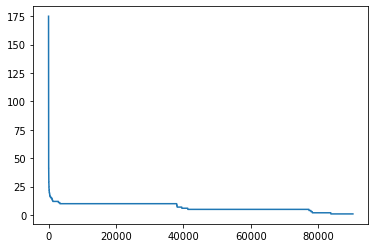

In [14]:
# Distribution Plot for frequency of each functions in the full tranpsrancy group

df_group3['Count'].plot()

## Functions Count for All Sample

In [15]:
df = pd.DataFrame(list(out.items()))
df = df.rename(columns={0:'Functions', 1:'Count'})
df = df[df['Functions'] != '']
df.sort_values(by='Count', ascending=False, inplace=True)
df_all = df.reset_index(drop=True)
df_all

,Functions,Count
0,google.maps.Map,620
1,document.getElementById,609
2,google.maps.Marker,607
3,data.cityofchicago.org,424
4,google.maps.LatLng,369
...,...,...
207570,options.jsonpCallbackFunction,1
207571,jsonpScript.setAttribute,1
207572,jsonpScript.id,1
207573,local.fetchJsonp,1


In [16]:
# Get the Frequency at each Quantiles for the Total Sample

for i in np.arange(0, 1, 0.05):
    print("Quantile: %.2f" %i, "Freq: ", df_all['Count'].quantile(i))

Quantile: 0.00 Freq:  1.0
Quantile: 0.05 Freq:  2.0
Quantile: 0.10 Freq:  2.0
Quantile: 0.15 Freq:  2.0
Quantile: 0.20 Freq:  4.0
Quantile: 0.25 Freq:  4.0
Quantile: 0.30 Freq:  4.0
Quantile: 0.35 Freq:  4.0
Quantile: 0.40 Freq:  4.0
Quantile: 0.45 Freq:  4.0
Quantile: 0.50 Freq:  4.0
Quantile: 0.55 Freq:  5.0
Quantile: 0.60 Freq:  5.0
Quantile: 0.65 Freq:  5.0
Quantile: 0.70 Freq:  5.0
Quantile: 0.75 Freq:  8.0
Quantile: 0.80 Freq:  10.0
Quantile: 0.85 Freq:  10.0
Quantile: 0.90 Freq:  18.0
Quantile: 0.95 Freq:  22.0


<AxesSubplot:>

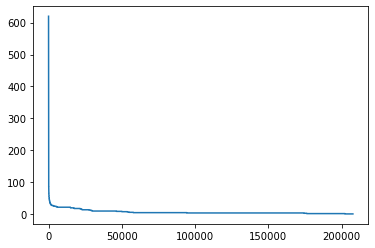

In [17]:
# Distribution Plot for frequency of each functions in the total sample

df_all['Count'].plot()

>> By the end of the discussion on 20th May, 2022, we conclude that we are using 10% as the cut-off for the rare functions. In the overall sample, we have a frequency of 2 at 10% for the functions.  In Bogota 1 ( performance transparency ), Bogota 2 ( solution transparency ), and Bogota 3 ( full transparency ), we have also 2 as the frequency for the quantile of 10%. In bogota 0 ( no tranparency ), although we have a frequency of 1 at the 10% quantile, the jump was straight towards 4 at the quantile of 25%, so we conclude in using 10% as the cut-off. 

## List of Functions with Frequency Count of 1 in Total Sample

In [18]:
[k for k, v in out.items() if v == 1]


[' lml.jpg',
 ' .floating',
 ' application.js',
 'this.App',
 'App.cable',
 'ActionCable.createConsumer',
 'div.dialog',
 'beaches.length',
 'userMarker.getPosition',
 'initialMarker.setAnimation',
 'initialMarker.addListener',
 'initialMarker.getAnimation',
 'selection.v',
 'event.target.matches',
 'dropdowns.length',
 'openDropdown.classList.contains',
 'openDropdown.classList.remove',
 'boton.type',
 'boton.addEventListener',
 ' blueberry.css',
 'mapExercise.printer',
 'mapExercise.markerButtonClicked',
 'MapExercise.markerButtonClicked',
 'imageManager.js',
 'cases.block',
 'cases.district',
 ' document.createElement',
 '.flex',
 'developers.google',
 'google.maps.Latlng',
 'google.maps.mapTypeId.ROADMAP',
 'custommovile.css',
 'this.parentElement.style.display',
 'spotlight.jpg',
 'm.schuepfen.ch',
 ' stylesheet.css',
 ' mainPage.css',
 'input.getElementsByTagName',
 'CENTER.lat',
 'CENTER.lng',
 ' eslint.org',
 'RULES.md',
 'webpack.base.conf',
 'Vue.config.productionTip',
 'webp

## List of Functions with Frequency Count of 2 in Total Sample

In [19]:
[k for k, v in out.items() if v == 2]


['wData.push',
 'wData.length',
 'aux.longitude',
 'UI.jpg',
 'inpObj.checkValidity',
 'inpObj.validationMessage',
 '.dropbtn',
 'jquery.blueberry.js',
 '.blueberry',
 ' cs.css',
 'location.svg',
 'googleMaps.js',
 'house.zip',
 'house.x',
 'house.y',
 'house.location',
 'fxLayout.xs',
 'fxFlexOrder.xs',
 'px.svg',
 'crime.address',
 'crime.property',
 'crime.phone',
 'crime.zip',
 'crime.management',
 'crime.units',
 'crime.x',
 'crime.y',
 'concha.jpg',
 'allRows.length',
 'e.mindate',
 'e.maxdate',
 'e.datacoverage',
 'table.row',
 'e.location.coordinates',
 'e.phone',
 'e.zip',
 'dataset.forEach',
 'resetStyle.css',
 'loadUpData.js',
 'grayscale.min.js',
 ' script.js',
 '.Condom',
 'datasetCondoms.js',
 'Chicago.jpg',
 'google.maps.SymbolPath.BACKWARD',
 'chi.append',
 'sodaConsumer.query',
 'o.geometry',
 'value.longitude',
 'value.latitude',
 'o.properties',
 'layers.forEach',
 'PRCP.reduce',
 'SNOW.reduce',
 'blueberry.css',
 'mapExercise.showLibrariesButtonClicked',
 'mapExerci

## List of Functions with Frequency Count of 3 in Total Sample

In [20]:
[k for k, v in out.items() if v == 3]


['.mcheck',
 'jsondata.js',
 'data.year',
 'info.uuid',
 'sdk.js',
 'MapExercise.initGoogleMap',
 'mapExercise.initGoogleMap',
 'mediaqueries.js',
 'locationsNear.push',
 'locationsNear.length',
 'findMeHome.js',
 'document.searchform.kmsTo.value',
 'document.searchform.moneyTo.value',
 'document.resultform.houseTo.value',
 '.police',
 'mycss.css',
 '.TMAX',
 'collection.v',
 'dispatch.v',
 'dsv.v',
 'request.v',
 'xmlResponse.responseText',
 'parks.data.length',
 'parks.data',
 'libraries.data.length',
 'libraries.data',
 'locations.map',
 'labels.push',
 'datarray.protype',
 'datarray.proname',
 'datarray.adress',
 'datarray.zip',
 'datarray.phone',
 'Terms.htm',
 '.schemeCategory',
 'd.class',
 'line.getElementsAtEvent',
 'line.data.datasets',
 'line.data.labels',
 'result.climate.url',
 'result.climate.token',
 'result.climate.stationid',
 'result.climate.datasetid',
 'obj.jsonData.stationid',
 'obj.jsonData.datasetid',
 'obj.jsonData.token',
 'filledHouse.jpg',
 'arrayPoliceStatio

In [21]:
round (len(out) * 0.05)

10379

In [22]:
round (len(out) * 0.1)

20758

In [23]:
round(len(out) * 0.15)

31136

In [24]:
round(len(out) * 0.2)

41515

In [25]:
## List the 5% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-10379-2:-1]
top_5_unique = []
for x in range(0,len(list_functions)):
    top_5_unique.append(list_functions[x][0])
top_5_unique = list(filter(None, top_5_unique))
len(top_5_unique)

10379

In [26]:
## List the 10% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-20758-2:-1]
top_10_unique = []
for x in range(0,len(list_functions)):
    top_10_unique.append(list_functions[x][0])
top_10_unique = list(filter(None, top_10_unique))
len(top_10_unique)

20758

In [27]:
## List the 15% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-31136-2:-1]
top_15_unique = []
for x in range(0,len(list_functions)):
    top_15_unique.append(list_functions[x][0])
top_15_unique = list(filter(None, top_15_unique))
len(top_15_unique)

31136

In [28]:
## List the 20% least common functions in a counter

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
out = collections.Counter(x)
list_functions = out.most_common()[:-41515-2:-1]
top_20_unique = []
for x in range(0,len(list_functions)):
    top_20_unique.append(list_functions[x][0])
top_20_unique = list(filter(None, top_20_unique))
len(top_20_unique)

41515

In [29]:
list_functions = out.most_common(20000)
list_functions

[('google.maps.Map', 620),
 ('document.getElementById', 609),
 ('google.maps.Marker', 607),
 ('data.cityofchicago.org', 424),
 ('google.maps.LatLng', 369),
 ('jquery.min.js', 364),
 ('JSON.parse', 349),
 ('bootstrap.min.js', 315),
 ('rows.json', 299),
 ('.innerHTML', 297),
 ('.min.js', 283),
 ('.js', 277),
 ('xmlhttp.send', 276),
 ('xmlhttp.open', 274),
 ('xmlhttp.onreadystatechange', 269),
 ('console.log', 267),
 ('google.maps.InfoWindow', 257),
 ('xmlhttp.responseText', 257),
 ('xmlhttp.readyState', 254),
 ('xmlhttp.status', 254),
 ('.each', 251),
 ('.v', 241),
 ('google.maps.event.addListener', 237),
 ('js.org', 216),
 ('infowindow.open', 204),
 ('.ajax', 202),
 ('json.data', 202),
 ('bootstrap.min.css', 194),
 ('.append', 193),
 ('.on', 188),
 ('.ready', 181),
 ('.value', 180),
 ('.text', 178),
 ('Math.random', 175),
 ('.click', 174),
 (' bootstrap.min.css', 172),
 ('.data', 168),
 ('.attr', 167),
 ('document.createElement', 164),
 ('Math.PI', 161),
 ('.css', 158),
 ('style.css', 1

list_functions2 = [(name, count) for name, count in list_functions]
plt.plot(*zip(*list_functions2))
plt.show()

In [30]:
list_functions2 = [count for name, count in list_functions]
list_functions2

[620,
 609,
 607,
 424,
 369,
 364,
 349,
 315,
 299,
 297,
 283,
 277,
 276,
 274,
 269,
 267,
 257,
 257,
 254,
 254,
 251,
 241,
 237,
 216,
 204,
 202,
 202,
 194,
 193,
 188,
 181,
 180,
 178,
 175,
 174,
 172,
 168,
 167,
 164,
 161,
 158,
 157,
 155,
 154,
 154,
 154,
 150,
 149,
 149,
 148,
 143,
 140,
 139,
 136,
 135,
 135,
 134,
 134,
 128,
 127,
 124,
 122,
 119,
 118,
 113,
 111,
 111,
 111,
 109,
 108,
 108,
 108,
 107,
 107,
 107,
 107,
 106,
 104,
 104,
 103,
 103,
 103,
 102,
 102,
 102,
 102,
 101,
 101,
 101,
 100,
 99,
 99,
 99,
 99,
 98,
 97,
 97,
 97,
 96,
 96,
 95,
 94,
 94,
 94,
 94,
 93,
 93,
 92,
 92,
 91,
 91,
 90,
 90,
 90,
 90,
 90,
 89,
 89,
 89,
 89,
 88,
 87,
 87,
 87,
 86,
 86,
 86,
 86,
 86,
 85,
 85,
 85,
 85,
 85,
 85,
 84,
 84,
 84,
 84,
 83,
 83,
 83,
 82,
 82,
 82,
 81,
 81,
 81,
 80,
 80,
 80,
 79,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 77,
 77,
 76,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 75,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 73,
 73,


In [31]:
list_functions2 = [name for name, count in list_functions]
list_functions2

['google.maps.Map',
 'document.getElementById',
 'google.maps.Marker',
 'data.cityofchicago.org',
 'google.maps.LatLng',
 'jquery.min.js',
 'JSON.parse',
 'bootstrap.min.js',
 'rows.json',
 '.innerHTML',
 '.min.js',
 '.js',
 'xmlhttp.send',
 'xmlhttp.open',
 'xmlhttp.onreadystatechange',
 'console.log',
 'google.maps.InfoWindow',
 'xmlhttp.responseText',
 'xmlhttp.readyState',
 'xmlhttp.status',
 '.each',
 '.v',
 'google.maps.event.addListener',
 'js.org',
 'infowindow.open',
 '.ajax',
 'json.data',
 'bootstrap.min.css',
 '.append',
 '.on',
 '.ready',
 '.value',
 '.text',
 'Math.random',
 '.click',
 ' bootstrap.min.css',
 '.data',
 '.attr',
 'document.createElement',
 'Math.PI',
 '.css',
 'style.css',
 '.length',
 '.slice',
 'Math.cos',
 '.push',
 '.main',
 '.remove',
 'Math.sin',
 '.done',
 'api.openweathermap.org',
 'Math.min',
 'data.length',
 'Math.max',
 '.toUpperCase',
 '.map',
 'infowindow.setContent',
 'Math.sqrt',
 '.style',
 'json.weather',
 '.select',
 'locations.push',
 'in

## Calculate the novelty measure based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

>> We define novelty as a relational construct in a landscape that is based on similarity distances between designs (apps).
Similarity is based on the code functions in the Kyriakou et. al. (2022)'s paper, it's based on common visual structures and verbal structures. 

For a single person similarity score of a particular phase, we will get the compared similarity score of the other people in the previous phase. We will identify the one with the highest similarity score to the other person. The novelty measure is then 1 - the highest similarity score. For each design in a phase, the novelty measure. Novelty is a dependent variable in our model. 

## Bogota 0 (No Transparency)

In [32]:
mean_stage1_bogota0_high_similarity = stage1_bogota0_high_similarity['similarity'].describe().loc['mean']
median_stage1_bogota0_high_similarity = stage1_bogota0_high_similarity['similarity'].median()

NameError: name 'stage1_bogota0_high_similarity' is not defined

In [ ]:
mean_stage2_bogota0_high_similarity = stage2_bogota0_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota0_high_similarity = stage2_bogota0_high_similarity['similarity'].median()

In [ ]:
mean_stage3_bogota0_high_similarity = stage3_bogota0_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota0_high_similarity = stage3_bogota0_high_similarity['similarity'].median()

In [ ]:
mean_stage4_bogota0_high_similarity = stage4_bogota0_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota0_high_similarity = stage4_bogota0_high_similarity['similarity'].median()

## Bogota 1 ( Performance Transparency )

In [ ]:
mean_stage1_bogota1_high_similarity = stage1_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage1_bogota1_high_similarity = stage1_bogota1_high_similarity['similarity'].median()

In [ ]:
mean_stage2_bogota1_high_similarity = stage2_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota1_high_similarity = stage2_bogota1_high_similarity['similarity'].median()

In [ ]:
mean_stage3_bogota1_high_similarity = stage3_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota1_high_similarity = stage3_bogota1_high_similarity['similarity'].median()

In [ ]:
mean_stage4_bogota1_high_similarity = stage4_bogota1_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota1_high_similarity = stage4_bogota1_high_similarity['similarity'].median()

## Bogota 2 ( Solution Transparency )

In [ ]:
mean_stage1_bogota2_high_similarity = stage1_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage1_bogota2_high_similarity = stage1_bogota2_high_similarity['similarity'].median()

In [ ]:
mean_stage2_bogota2_high_similarity = stage2_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota2_high_similarity = stage2_bogota2_high_similarity['similarity'].median()

In [ ]:
mean_stage3_bogota2_high_similarity = stage3_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota2_high_similarity = stage3_bogota2_high_similarity['similarity'].median()

In [ ]:
mean_stage4_bogota2_high_similarity = stage4_bogota2_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota2_high_similarity = stage4_bogota2_high_similarity['similarity'].median()

## Bogota 3 ( Full Transparency )

In [ ]:
mean_stage1_bogota3_high_similarity = stage1_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage1_bogota3_high_similarity = stage1_bogota3_high_similarity['similarity'].median()

In [ ]:
mean_stage2_bogota3_high_similarity = stage2_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage2_bogota3_high_similarity = stage2_bogota3_high_similarity['similarity'].median()

In [ ]:
mean_stage3_bogota3_high_similarity = stage3_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage3_bogota3_high_similarity = stage3_bogota3_high_similarity['similarity'].median()

In [ ]:
mean_stage4_bogota3_high_similarity = stage4_bogota3_high_similarity['similarity'].describe().loc['mean']
median_stage4_bogota3_high_similarity = stage4_bogota3_high_similarity['similarity'].median()

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [mean_stage1_bogota0_high_similarity, mean_stage2_bogota0_high_similarity, mean_stage3_bogota0_high_similarity, mean_stage4_bogota0_high_similarity]
y2 = [mean_stage1_bogota1_high_similarity, mean_stage2_bogota1_high_similarity, mean_stage3_bogota1_high_similarity, mean_stage4_bogota1_high_similarity]
y3 = [mean_stage1_bogota2_high_similarity, mean_stage2_bogota2_high_similarity, mean_stage3_bogota2_high_similarity, mean_stage4_bogota2_high_similarity]
y4 = [mean_stage1_bogota3_high_similarity, mean_stage2_bogota3_high_similarity, mean_stage3_bogota3_high_similarity, mean_stage4_bogota3_high_similarity]


x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Highest Similarity Scores")
plt.ylabel("Mean Highest Similarity Scores")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [median_stage1_bogota0_high_similarity, median_stage2_bogota0_high_similarity, median_stage3_bogota0_high_similarity, median_stage4_bogota0_high_similarity]
y2 = [median_stage1_bogota1_high_similarity, median_stage2_bogota1_high_similarity, median_stage3_bogota1_high_similarity, median_stage4_bogota1_high_similarity]
y3 = [median_stage1_bogota2_high_similarity, median_stage2_bogota2_high_similarity, median_stage3_bogota2_high_similarity, median_stage4_bogota2_high_similarity]
y4 = [median_stage1_bogota3_high_similarity, median_stage2_bogota3_high_similarity, median_stage3_bogota3_high_similarity, median_stage4_bogota3_high_similarity]

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Highest Similarity Scores")
plt.ylabel("Median Highest Similarity Scores")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
median_bogota3_stage4 = stage4_bogota3_high_similarity['similarity'].median()
median_bogota3_stage3 = stage3_bogota3_high_similarity['similarity'].median()
median_bogota3_stage2 = stage2_bogota3_high_similarity['similarity'].median()
median_bogota3_stage1 = stage1_bogota3_high_similarity['similarity'].median()

median_bogota2_stage4 = stage4_bogota2_high_similarity['similarity'].median()
median_bogota2_stage3 = stage3_bogota2_high_similarity['similarity'].median()
median_bogota2_stage2 = stage2_bogota2_high_similarity['similarity'].median()
median_bogota2_stage1 = stage1_bogota2_high_similarity['similarity'].median()

median_bogota1_stage4 = stage4_bogota1_high_similarity['similarity'].median()
median_bogota1_stage3 = stage3_bogota1_high_similarity['similarity'].median()
median_bogota1_stage2 = stage2_bogota1_high_similarity['similarity'].median()
median_bogota1_stage1 = stage1_bogota1_high_similarity['similarity'].median()

median_bogota0_stage4 = stage4_bogota0_high_similarity['similarity'].median()
median_bogota0_stage3 = stage3_bogota0_high_similarity['similarity'].median()
median_bogota0_stage2 = stage2_bogota0_high_similarity['similarity'].median()
median_bogota0_stage1 = stage1_bogota0_high_similarity['similarity'].median()

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [median_bogota0_stage1, median_bogota0_stage2, median_bogota0_stage3, median_bogota0_stage4 ]
y2 = [median_bogota1_stage1, median_bogota1_stage2, median_bogota1_stage3, median_bogota1_stage4 ]
y3 = [median_bogota2_stage1, median_bogota2_stage2, median_bogota2_stage3, median_bogota2_stage4 ]
y4 = [median_bogota3_stage1, median_bogota3_stage2, median_bogota3_stage3, median_bogota3_stage4 ]


x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Highest Similarity")
plt.ylabel("Highest Similarity Scores")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

>> Distance from the mean and median of the groups 

>> This might be because the overall sample of functionality is small for the no transparency case. 
>> We need to get the whole sample. We need to calculate the novelty measure based on the similarity compared to the entire sample in the whole phases. 

In [ ]:
out

In [ ]:
## Remove all duplicates and empty string from the entire function list

overall_12 = overall_phase1.append(overall_phase2, ignore_index=True)
overall_23 = overall_12.append(overall_phase3, ignore_index=True)
overall_34 = overall_23.append(overall_phase4, ignore_index=True)
overall_45 = overall_34.append(overall_phase5, ignore_index=True)
overall_45['functions'].replace('', np.nan, inplace=True)
overall_45.dropna(subset=['functions'], inplace=True)
overall_45_functions = overall_45['functions'].to_list()
string = " ".join(overall_45_functions)
x = string.split(",")
remove_duplicates = list(set(x))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_global = len(remove_all_duplicates)

In [ ]:
str1 = ','.join(remove_all_duplicates)
#subset_bogota0_phase5.loc[len(subset_bogota0_phase5.index)] = ['all', str1, 0]
str1

In [ ]:
global_functions = {'Student': ['all'], 'functions': str1, 'phase': [0]}
global_functions = pd.DataFrame(data=global_functions)
global_functions

## Append Global Functions with Bogota 0 Phase 5

In [ ]:
subset_bogota0_phase5_all = subset_bogota0_phase5.append(global_functions, ignore_index=True)
print(subset_bogota0_phase5_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase5_all["functions"], subset_bogota0_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase5_compare_all = pd.DataFrame(result)
subset_bogota0_phase5_compare_all

In [ ]:
subset_bogota0_phase5_all_only = subset_bogota0_phase5_compare_all.loc[subset_bogota0_phase5_compare_all['user2'] == 'all']
subset_bogota0_phase5_all_only

## Append Global Functions with Bogota 0 Phase 4

In [ ]:
subset_bogota0_phase4_all = subset_bogota0_phase4.append(global_functions, ignore_index=True)
print(subset_bogota0_phase4_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase4_all["functions"], subset_bogota0_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase4_compare_all = pd.DataFrame(result)
subset_bogota0_phase4_compare_all

In [ ]:
subset_bogota0_phase4_all_only = subset_bogota0_phase4_compare_all.loc[subset_bogota0_phase4_compare_all['user2'] == 'all']
subset_bogota0_phase4_all_only

## Append Global Functions with Bogota 0 Phase 3

In [ ]:
subset_bogota0_phase3_all = subset_bogota0_phase3.append(global_functions, ignore_index=True)
print(subset_bogota0_phase3_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase3_all["functions"], subset_bogota0_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase3_compare_all = pd.DataFrame(result)
subset_bogota0_phase3_compare_all

In [ ]:
subset_bogota0_phase3_all_only = subset_bogota0_phase3_compare_all.loc[subset_bogota0_phase3_compare_all['user2'] == 'all']
subset_bogota0_phase3_all_only

## Append Global Functions with Bogota 0 Phase 2

In [ ]:
subset_bogota0_phase2_all = subset_bogota0_phase2.append(global_functions, ignore_index=True)
print(subset_bogota0_phase2_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase2_all["functions"], subset_bogota0_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase2_compare_all = pd.DataFrame(result)
subset_bogota0_phase2_compare_all

In [ ]:
subset_bogota0_phase2_all_only = subset_bogota0_phase2_compare_all.loc[subset_bogota0_phase2_compare_all['user2'] == 'all']
subset_bogota0_phase2_all_only

## Append Global Functions with Bogota 0 Phase 1

In [ ]:
subset_bogota0_phase1_all = subset_bogota0_phase1.append(global_functions, ignore_index=True)
print(subset_bogota0_phase1_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota0_phase1_all["functions"], subset_bogota0_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota0_phase1_compare_all = pd.DataFrame(result)
subset_bogota0_phase1_compare_all

In [ ]:
subset_bogota0_phase1_all_only = subset_bogota0_phase1_compare_all.loc[subset_bogota0_phase1_compare_all['user2'] == 'all']
subset_bogota0_phase1_all_only

## Append Global Functions with Bogota 1 Phase 5

In [ ]:
subset_bogota1_phase5_all = subset_bogota1_phase5.append(global_functions, ignore_index=True)
print(subset_bogota1_phase5_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase5_all["functions"], subset_bogota1_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase5_compare_all = pd.DataFrame(result)
subset_bogota1_phase5_compare_all

In [ ]:
subset_bogota1_phase5_all_only = subset_bogota1_phase5_compare_all.loc[subset_bogota1_phase5_compare_all['user2'] == 'all']
subset_bogota1_phase5_all_only

## Append Global Functions with Bogota 1 Phase 4

In [ ]:
subset_bogota1_phase4_all = subset_bogota1_phase4.append(global_functions, ignore_index=True)
print(subset_bogota1_phase4_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase4_all["functions"], subset_bogota1_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase4_compare_all = pd.DataFrame(result)
subset_bogota1_phase4_compare_all

In [ ]:
subset_bogota1_phase4_all_only = subset_bogota1_phase4_compare_all.loc[subset_bogota1_phase4_compare_all['user2'] == 'all']
subset_bogota1_phase4_all_only

## Append Global Functions with Bogota 1 Phase 3

In [ ]:
subset_bogota1_phase3_all = subset_bogota1_phase3.append(global_functions, ignore_index=True)
print(subset_bogota1_phase3_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase3_all["functions"], subset_bogota1_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase3_compare_all = pd.DataFrame(result)
subset_bogota1_phase3_compare_all

In [ ]:
subset_bogota1_phase3_all_only = subset_bogota1_phase3_compare_all.loc[subset_bogota1_phase3_compare_all['user2'] == 'all']
subset_bogota1_phase3_all_only

## Append Global Functions with Bogota 1 Phase 2

In [ ]:
subset_bogota1_phase2_all = subset_bogota1_phase2.append(global_functions, ignore_index=True)
print(subset_bogota1_phase2_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase2_all["functions"], subset_bogota1_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase2_compare_all = pd.DataFrame(result)
subset_bogota1_phase2_compare_all

In [ ]:
subset_bogota1_phase2_all_only = subset_bogota1_phase2_compare_all.loc[subset_bogota1_phase2_compare_all['user2'] == 'all']
subset_bogota1_phase2_all_only

## Append Global Functions with Bogota 1 Phase 1

In [ ]:
subset_bogota1_phase1_all = subset_bogota1_phase1.append(global_functions, ignore_index=True)
print(subset_bogota1_phase1_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota1_phase1_all["functions"], subset_bogota1_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota1_phase1_compare_all = pd.DataFrame(result)
subset_bogota1_phase1_compare_all

In [ ]:
subset_bogota1_phase1_all_only = subset_bogota1_phase1_compare_all.loc[subset_bogota1_phase1_compare_all['user2'] == 'all']
subset_bogota1_phase1_all_only

## Append Global Functions with Bogota 2 Phase 5

In [ ]:
subset_bogota2_phase5_all = subset_bogota2_phase5.append(global_functions, ignore_index=True)
print(subset_bogota2_phase5_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase5_all["functions"], subset_bogota2_phase5_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase5_compare_all = pd.DataFrame(result)
subset_bogota2_phase5_compare_all

In [ ]:
subset_bogota2_phase5_all_only = subset_bogota2_phase5_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase5_all_only

## Append Global Functions with Bogota 2 Phase 4

In [ ]:
subset_bogota2_phase4_all = subset_bogota2_phase4.append(global_functions, ignore_index=True)
print(subset_bogota2_phase4_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase4_all["functions"], subset_bogota2_phase4_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase4_compare_all = pd.DataFrame(result)
subset_bogota2_phase4_compare_all

In [ ]:
subset_bogota2_phase4_all_only = subset_bogota2_phase4_compare_all.loc[subset_bogota2_phase5_compare_all['user2'] == 'all']
subset_bogota2_phase4_all_only

## Append Global Functions with Bogota 2 Phase 3

In [ ]:
subset_bogota2_phase3_all = subset_bogota2_phase3.append(global_functions, ignore_index=True)
print(subset_bogota2_phase3_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase3_all["functions"], subset_bogota2_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase3_compare_all = pd.DataFrame(result)
subset_bogota2_phase3_compare_all

In [ ]:
subset_bogota2_phase3_all_only = subset_bogota2_phase3_compare_all.loc[subset_bogota2_phase3_compare_all['user2'] == 'all']
subset_bogota2_phase3_all_only

## Append Global Functions with Bogota 2 Phase 2

In [ ]:
subset_bogota2_phase2_all = subset_bogota2_phase2.append(global_functions, ignore_index=True)
print(subset_bogota2_phase2_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase2_all["functions"], subset_bogota2_phase2_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase2_compare_all = pd.DataFrame(result)
subset_bogota2_phase2_compare_all

In [ ]:
subset_bogota2_phase2_all_only = subset_bogota2_phase2_compare_all.loc[subset_bogota2_phase2_compare_all['user2'] == 'all']
subset_bogota2_phase2_all_only

## Append Global Functions with Bogota 2 Phase 1

In [ ]:
subset_bogota2_phase1_all = subset_bogota2_phase1.append(global_functions, ignore_index=True)
print(subset_bogota2_phase1_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota2_phase1_all["functions"], subset_bogota2_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota2_phase1_compare_all = pd.DataFrame(result)
subset_bogota2_phase1_compare_all

In [ ]:
subset_bogota2_phase1_all_only = subset_bogota2_phase1_compare_all.loc[subset_bogota2_phase1_compare_all['user2'] == 'all']
subset_bogota2_phase1_all_only

## Append Global Functions with Bogota 3 Phase 5

In [ ]:
overall_phase5_bogota3_all = overall_phase5_bogota3.append(global_functions, ignore_index=True)


In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase5_bogota3_all["functions"], overall_phase5_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase5_bogota3_compare_all = pd.DataFrame(result)
overall_phase5_bogota3_compare_all

In [ ]:
overall_phase5_bogota3_all_only = overall_phase5_bogota3_compare_all.loc[overall_phase5_bogota3_compare_all['user2'] == 'all']
overall_phase5_bogota3_all_only

## Append Global Functions with Bogota 3 Phase 4

In [ ]:
overall_phase4_bogota3_all = overall_phase4_bogota3.append(global_functions, ignore_index=True)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase4_bogota3_all["functions"], overall_phase4_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase4_bogota3_compare_all = pd.DataFrame(result)
overall_phase4_bogota3_compare_all

In [ ]:
overall_phase4_bogota3_all_only = overall_phase4_bogota3_compare_all.loc[overall_phase4_bogota3_compare_all['user2'] == 'all']
overall_phase4_bogota3_all_only

## Append Global Functions with Bogota 3 Phase 3

In [ ]:
subset_bogota3_phase3_all = subset_bogota3_phase3.append(global_functions, ignore_index=True)
print(subset_bogota3_phase3_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase3_all["functions"], subset_bogota3_phase3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase3_compare_all = pd.DataFrame(result)
subset_bogota3_phase3_compare_all

In [ ]:
subset_bogota3_phase3_all_only = subset_bogota3_phase3_compare_all.loc[subset_bogota3_phase3_compare_all['user2'] == 'all']
subset_bogota3_phase3_all_only

## Append Global Functions with Bogota 3 Phase 2

In [ ]:
overall_phase2_bogota3_all = overall_phase2_bogota3.append(global_functions, ignore_index=True)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(overall_phase2_bogota3_all["functions"], overall_phase2_bogota3_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

overall_phase2_bogota3_compare_all = pd.DataFrame(result)
overall_phase2_bogota3_compare_all

In [ ]:
overall_phase2_bogota3_all_only = overall_phase2_bogota3_compare_all.loc[overall_phase2_bogota3_compare_all['user2'] == 'all']
overall_phase2_bogota3_all_only

## Append Global Functions with Bogota 3 Phase 1

In [ ]:
subset_bogota3_phase1_all = subset_bogota3_phase1.append(global_functions, ignore_index=True)
print(subset_bogota3_phase1_all)

In [ ]:
import itertools
import pandas as pd

overall_phase4_bogota3 = overall_phase4_bogota3[overall_phase4_bogota3.functions != '']

# copied from OP above
def jaccard_similarity(x, y):
    """ returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

# create list of tuples like [(wording, user), (wording, user)]
wordings_users = list(zip(subset_bogota3_phase1_all["functions"], subset_bogota3_phase1_all["Student"]))

result = []

# create list of all possible combinations between sets of (wording, user) and loop through them
for item in list(itertools.combinations(wordings_users, 2)):
    similarity = jaccard_similarity(item[0][0], item[1][0])
    data = {"user1": item[0][1], "user2": item[1][1], "similarity": similarity}
    result.append(data)

subset_bogota3_phase1_compare_all = pd.DataFrame(result)
subset_bogota3_phase1_compare_all

In [ ]:
subset_bogota3_phase1_all_only = subset_bogota3_phase1_compare_all.loc[subset_bogota3_phase1_compare_all['user2'] == 'all']
subset_bogota3_phase1_all_only

## Descriptive Statistics of Comparisons with Global Functions

## Bogota 3

In [ ]:
global_bogota3_phase1_mean = subset_bogota3_phase1_all_only['similarity'].describe().loc['mean']
global_bogota3_phase1_median = subset_bogota3_phase1_all_only['similarity'].median()
global_bogota3_phase1_min = subset_bogota3_phase1_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota3_phase2_mean = overall_phase2_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase2_median = overall_phase2_bogota3_all_only['similarity'].median()
global_bogota3_phase2_min = overall_phase2_bogota3_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota3_phase3_mean = subset_bogota3_phase3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase3_median = subset_bogota3_phase3_all_only['similarity'].median()
global_bogota3_phase3_min = subset_bogota3_phase3_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota3_phase4_mean  = overall_phase4_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase4_median  = overall_phase4_bogota3_all_only['similarity'].median()
global_bogota3_phase4_min = overall_phase4_bogota3_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota3_phase5_mean = overall_phase5_bogota3_all_only['similarity'].describe().loc['mean']
global_bogota3_phase5_median = overall_phase5_bogota3_all_only['similarity'].median()
global_bogota3_phase5_min = overall_phase5_bogota3_all_only['similarity'].describe().loc['min']

## Bogota 2

In [ ]:
global_bogota2_phase1_mean  = subset_bogota2_phase1_all_only['similarity'].describe().loc['mean']
global_bogota2_phase1_median = subset_bogota2_phase1_all_only['similarity'].median()
global_bogota2_phase1_min = subset_bogota2_phase1_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota2_phase2_mean  = subset_bogota2_phase2_all_only['similarity'].describe().loc['mean']
global_bogota2_phase2_median = subset_bogota2_phase2_all_only['similarity'].median()
global_bogota2_phase2_min = subset_bogota2_phase2_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota2_phase3_mean  = subset_bogota2_phase3_all_only['similarity'].describe().loc['mean']
global_bogota2_phase3_median = subset_bogota2_phase3_all_only['similarity'].median()
global_bogota2_phase3_min = subset_bogota2_phase3_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota2_phase4_mean  = subset_bogota2_phase4_all_only['similarity'].describe().loc['mean']
global_bogota2_phase4_median = subset_bogota2_phase4_all_only['similarity'].median()
global_bogota2_phase4_min = subset_bogota2_phase4_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota2_phase5_mean  = subset_bogota2_phase5_all_only['similarity'].describe().loc['mean']
global_bogota2_phase5_median = subset_bogota2_phase5_all_only['similarity'].median()
global_bogota2_phase5_min = subset_bogota2_phase5_all_only['similarity'].describe().loc['min']

## Bogota 1

In [ ]:
global_bogota1_phase1_mean = subset_bogota1_phase1_all_only['similarity'].describe().loc['mean']
global_bogota1_phase1_median = subset_bogota1_phase1_all_only['similarity'].median()
global_bogota1_phase1_min = subset_bogota1_phase1_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota1_phase2_mean = subset_bogota1_phase2_all_only['similarity'].describe().loc['mean']
global_bogota1_phase2_median = subset_bogota1_phase2_all_only['similarity'].median()
global_bogota1_phase2_min = subset_bogota1_phase2_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota1_phase3_mean = subset_bogota1_phase3_all_only['similarity'].describe().loc['mean']
global_bogota1_phase3_median = subset_bogota1_phase3_all_only['similarity'].median()
global_bogota1_phase3_min = subset_bogota1_phase3_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota1_phase4_mean = subset_bogota1_phase4_all_only['similarity'].describe().loc['mean']
global_bogota1_phase4_median = subset_bogota1_phase4_all_only['similarity'].median()
global_bogota1_phase4_min = subset_bogota1_phase4_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota1_phase5_mean = subset_bogota1_phase5_all_only['similarity'].describe().loc['mean']
global_bogota1_phase5_median = subset_bogota1_phase5_all_only['similarity'].median()
global_bogota1_phase5_min = subset_bogota1_phase5_all_only['similarity'].describe().loc['min']

## Bogota 0

In [ ]:
global_bogota0_phase1_mean = subset_bogota0_phase1_all_only['similarity'].describe().loc['mean']
global_bogota0_phase1_median = subset_bogota0_phase1_all_only['similarity'].median()
global_bogota0_phase1_min = subset_bogota0_phase1_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota0_phase2_mean  = subset_bogota0_phase2_all_only['similarity'].describe().loc['mean']
global_bogota0_phase2_median = subset_bogota0_phase2_all_only['similarity'].median()
global_bogota0_phase2_min = subset_bogota0_phase2_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota0_phase3_mean  = subset_bogota0_phase3_all_only['similarity'].describe().loc['mean']
global_bogota0_phase3_median = subset_bogota0_phase3_all_only['similarity'].median()
global_bogota0_phase3_min = subset_bogota0_phase3_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota0_phase4_mean = subset_bogota0_phase4_all_only['similarity'].describe().loc['mean']
global_bogota0_phase4_median = subset_bogota0_phase4_all_only['similarity'].median()
global_bogota0_phase4_min = subset_bogota0_phase4_all_only['similarity'].describe().loc['min']

In [ ]:
global_bogota0_phase5_mean  = subset_bogota0_phase5_all_only['similarity'].describe().loc['mean']
global_bogota0_phase5_median = subset_bogota0_phase5_all_only['similarity'].median()
global_bogota0_phase5_min = subset_bogota0_phase5_all_only['similarity'].describe().loc['min']

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_mean, global_bogota0_phase2_mean, global_bogota0_phase3_mean, global_bogota0_phase4_mean, global_bogota0_phase5_mean]
y2 = [global_bogota1_phase1_mean, global_bogota1_phase2_mean, global_bogota1_phase3_mean, global_bogota1_phase4_mean, global_bogota1_phase5_mean]
y3 = [global_bogota2_phase1_mean, global_bogota2_phase2_mean, global_bogota2_phase3_mean, global_bogota2_phase4_mean, global_bogota2_phase5_mean]
y4 = [global_bogota3_phase1_mean, global_bogota3_phase2_mean, global_bogota3_phase3_mean, global_bogota3_phase4_mean, global_bogota3_phase5_mean]


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Similarity in Global Functions Context")
plt.ylabel("Mean Similarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_median, global_bogota0_phase2_median, global_bogota0_phase3_median, global_bogota0_phase4_median, global_bogota0_phase5_median]
y2 = [global_bogota1_phase1_median, global_bogota1_phase2_median, global_bogota1_phase3_median, global_bogota1_phase4_median, global_bogota1_phase5_median]
y3 = [global_bogota2_phase1_median, global_bogota2_phase2_median, global_bogota2_phase3_median, global_bogota2_phase4_median, global_bogota2_phase5_median]
y4 = [global_bogota3_phase1_median, global_bogota3_phase2_median, global_bogota3_phase3_median, global_bogota3_phase4_median, global_bogota3_phase5_median]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Similarity in Global Functions Context")
plt.ylabel("Median Similarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [global_bogota0_phase1_min, global_bogota0_phase2_min, global_bogota0_phase3_min, global_bogota0_phase4_min, global_bogota0_phase5_min ]
y2 = [global_bogota1_phase1_min, global_bogota1_phase2_min, global_bogota1_phase3_min, global_bogota1_phase4_min, global_bogota1_phase5_min]
y3 = [global_bogota2_phase1_min, global_bogota2_phase2_min, global_bogota2_phase3_min, global_bogota2_phase4_min, global_bogota2_phase5_min ]
y4 = [global_bogota3_phase1_min, global_bogota3_phase2_min, global_bogota3_phase3_min, global_bogota3_phase4_min, global_bogota3_phase5_min]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Minimum Similarity in Global Functions Context")
plt.ylabel("Minimum Similarity Scores")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
df0_merged[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]] = df0_merged[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]].apply(np.log)
df0_merged

In [ ]:
subset = df0_merged[["b0-p1-similarity", "b0-p2-similarity", "b0-p3-similarity", "b0-p4-similarity", "b0-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b0=[]
mean_list_b0=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b0.append(subset[column].describe().loc['50%'])
    mean_list_b0.append(subset[column].describe().loc['mean'])

In [ ]:
from functools import reduce
b2_p1 = subset_bogota2_phase1_all_only.rename(columns = {'similarity':'b2-p1-similarity'}, inplace = False)
b2_p2 = subset_bogota2_phase2_all_only.rename(columns = {'similarity':'b2-p2-similarity'}, inplace = False)
b2_p3 = subset_bogota2_phase3_all_only.rename(columns = {'similarity':'b2-p3-similarity'}, inplace = False)
b2_p4 = subset_bogota2_phase3_all_only.rename(columns = {'similarity':'b2-p4-similarity'}, inplace = False)
b2_p5 = subset_bogota2_phase5_all_only.rename(columns = {'similarity':'b2-p5-similarity'}, inplace = False)
data_frames = [b2_p1, b2_p2, b2_p3, b2_p4, b2_p5]
df2_merged = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)
df2_merged

In [ ]:
df2_merged[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]] = df2_merged[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]].apply(np.log)
df2_merged

In [ ]:
subset = df2_merged[["b2-p1-similarity", "b2-p2-similarity", "b2-p3-similarity", "b2-p4-similarity", "b2-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b2=[]
mean_list_b2=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b2.append(subset[column].describe().loc['50%'])
    mean_list_b2.append(subset[column].describe().loc['mean'])

In [ ]:
from functools import reduce
b3_p1 = subset_bogota3_phase1_all_only.rename(columns = {'similarity':'b3-p1-similarity'}, inplace = False)
b3_p2 = overall_phase2_bogota3_all_only.rename(columns = {'similarity':'b3-p2-similarity'}, inplace = False)
b3_p3 = overall_phase2_bogota3_all_only.rename(columns = {'similarity':'b3-p3-similarity'}, inplace = False)
b3_p4 = subset_bogota3_phase3_all_only.rename(columns = {'similarity':'b3-p4-similarity'}, inplace = False)
b3_p5 = overall_phase2_bogota3_all_only.rename(columns = {'similarity':'b3-p5-similarity'}, inplace = False)
data_frames = [b3_p1, b3_p2, b3_p3, b3_p4, b3_p5]
df3_merged = reduce(lambda  left, right: pd.merge(left, right,on=['user1'], how='outer'), data_frames)
df3_merged

In [ ]:
df3_merged[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]] = df3_merged[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]].apply(np.log)
df3_merged

In [ ]:
subset = df3_merged[["b3-p1-similarity", "b3-p2-similarity", "b3-p3-similarity", "b3-p4-similarity", "b3-p5-similarity"]]
import matplotlib.pyplot as plt
import seaborn as sns

median_list_b3=[]
mean_list_b3=[]

for i, column in enumerate(subset.columns, 1):
    plt.subplot(2,3,i)
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(subset[column])
    median_list_b3.append(subset[column].describe().loc['50%'])
    mean_list_b3.append(subset[column].describe().loc['mean'])

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_list_b0
y2 = median_list_b1
y3 = median_list_b2
y4 = median_list_b3


x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Log-Transform Median Dissimilarity in Global Functions Context")
plt.ylabel("Log-Transform Median Dissimilarity")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Calculate the uniqueness measure based on Uzzi's and Sio's paper. [ Have to be Read ]

Atypical combinations and scientific impact by Uzzi 

Take the whole sample of functions and identify the most common and the least common functions based on the 90% most common and 10% least common functions. Explore in which group they occur and which phase. 

In [ ]:
overall_45_functions = overall_45['functions'].to_list()
overall_45_functions

In [ ]:
## 20,000. most unique functions 
new_list

## Phase 5

In [ ]:
listed = overall_phase5_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase5 = joined_string.split(",")
bogota3_phase5

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(new_list)))
len_unique_bogota3_phase5 = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase5 = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase5  = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase5  = len(unique_bogota3_phase5)

In [ ]:
unique_bogota3_phase5 = list(set(bogota3_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase5  = len(unique_bogota3_phase5)

In [ ]:
listed = overall_phase5_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase5 = joined_string.split(",")
bogota1_phase5

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(new_list)))
len_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
unique_bogota1_phase5 = list(set(bogota1_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase5 = len(unique_bogota1_phase5)

In [ ]:
listed = overall_phase5_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase5 = joined_string.split(",")
bogota2_phase5

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(new_list)))
len_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
unique_bogota2_phase5 = list(set(bogota2_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase5 = len(unique_bogota2_phase5)

In [ ]:
listed = overall_phase5_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase5 = joined_string.split(",")
bogota0_phase5

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(new_list)))
len_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase5 = len(unique_bogota0_phase5)

In [ ]:
unique_bogota0_phase5 = list(set(bogota0_phase5).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase5 = len(unique_bogota0_phase5)

## Phase 4

In [ ]:
listed = overall_phase4_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase4 = joined_string.split(",")


In [ ]:
listed = overall_phase4_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase4 = joined_string.split(",")


In [ ]:
listed = overall_phase4_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase4 = joined_string.split(",")


In [ ]:
listed = overall_phase4_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase4 = joined_string.split(",")


In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(new_list)))
len_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota3_phase4 = list(set(bogota3_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase4 = len(unique_bogota3_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(new_list)))
len_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(new_list)))
len_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota2_phase4 = list(set(bogota2_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase4 = len(unique_bogota2_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(new_list)))
len_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota1_phase4 = list(set(bogota1_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase4 = len(unique_bogota1_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(new_list)))
len_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase4 = len(unique_bogota0_phase4)

In [ ]:
unique_bogota0_phase4 = list(set(bogota0_phase4).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase4 = len(unique_bogota0_phase4)

## Phase 3

In [ ]:
listed = overall_phase3_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase3 = joined_string.split(",")

In [ ]:
listed = overall_phase3_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase3 = joined_string.split(",")

In [ ]:
listed = overall_phase3_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase3 = joined_string.split(",")

In [ ]:
listed = overall_phase3_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase3 = joined_string.split(",")

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(new_list)))
len_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota3_phase3 = list(set(bogota3_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase3 = len(unique_bogota3_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(new_list)))
len_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota2_phase3 = list(set(bogota2_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase3 = len(unique_bogota2_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(new_list)))
len_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota1_phase3 = list(set(bogota1_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase3 = len(unique_bogota1_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(new_list)))
len_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase3 = len(unique_bogota0_phase3)

In [ ]:
unique_bogota0_phase3 = list(set(bogota0_phase3).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase3 = len(unique_bogota0_phase3)

## Phase 2

In [ ]:
listed = overall_phase2_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase2 = joined_string.split(",")

In [ ]:
listed = overall_phase2_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase2 = joined_string.split(",")

In [ ]:
listed = overall_phase2_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase2 = joined_string.split(",")

In [ ]:
listed = overall_phase2_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase2 = joined_string.split(",")

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(new_list)))
len_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota3_phase2 = list(set(bogota3_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase2 = len(unique_bogota3_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(new_list)))
len_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota2_phase2 = list(set(bogota2_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase2 = len(unique_bogota2_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(new_list)))
len_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota1_phase2 = list(set(bogota1_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase2 = len(unique_bogota1_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(new_list)))
len_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase2 = len(unique_bogota0_phase2)

In [ ]:
unique_bogota0_phase2 = list(set(bogota0_phase2).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase2 = len(unique_bogota0_phase2)

## Phase 1

In [ ]:
listed = overall_phase1_bogota3['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota3_phase1 = joined_string.split(",")

In [ ]:
listed = overall_phase1_bogota2['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota2_phase1 = joined_string.split(",")

In [ ]:
listed = overall_phase1_bogota1['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota1_phase1 = joined_string.split(",")

In [ ]:
listed = overall_phase1_bogota0['functions'].to_list()
converted_list = [str(element) for element in  listed]
joined_string = ",".join(converted_list)
bogota0_phase1 = joined_string.split(",")

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(new_list)))
len_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota3_phase1 = list(set(bogota3_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota3_phase1 = len(unique_bogota3_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(new_list)))
len_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota2_phase1 = list(set(bogota2_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota2_phase1 = len(unique_bogota2_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(new_list)))
len_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota1_phase1 = list(set(bogota1_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota1_phase1 = len(unique_bogota1_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(new_list)))
len_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_5_unique)))
top_5_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_10_unique)))
top_10_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_15_unique)))
top_15_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
unique_bogota0_phase1 = list(set(bogota0_phase1).intersection(set(top_20_unique)))
top_20_unique_bogota0_phase1 = len(unique_bogota0_phase1)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [len_unique_bogota0_phase1, len_unique_bogota0_phase2, len_unique_bogota0_phase3, len_unique_bogota0_phase4, len_unique_bogota0_phase5]
y2 = [len_unique_bogota1_phase1, len_unique_bogota1_phase2, len_unique_bogota1_phase3, len_unique_bogota1_phase4, len_unique_bogota1_phase5]
y3 = [len_unique_bogota2_phase1, len_unique_bogota2_phase2, len_unique_bogota2_phase3, len_unique_bogota2_phase4, len_unique_bogota2_phase5]
y4 = [len_unique_bogota3_phase1, len_unique_bogota3_phase2, len_unique_bogota3_phase3, len_unique_bogota3_phase4, len_unique_bogota3_phase5]   



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Unique Functions ( 20,000 )")
plt.ylabel("Count of Unique Functions ( 20,000 )")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_5_unique_bogota0_phase1, top_5_unique_bogota0_phase2, top_5_unique_bogota0_phase3, top_5_unique_bogota0_phase4, top_5_unique_bogota0_phase5]
y2 = [ top_5_unique_bogota1_phase1, top_5_unique_bogota1_phase2, top_5_unique_bogota1_phase3, top_5_unique_bogota1_phase4, top_5_unique_bogota1_phase5]
y3 = [ top_5_unique_bogota2_phase1, top_5_unique_bogota2_phase2, top_5_unique_bogota2_phase3, top_5_unique_bogota2_phase4, top_5_unique_bogota2_phase5]
y4 = [ top_5_unique_bogota3_phase1, top_5_unique_bogota3_phase2, top_5_unique_bogota3_phase3, top_5_unique_bogota3_phase4, top_5_unique_bogota3_phase5]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 5% Least Common Functions")
plt.ylabel("Count of Top 5% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_10_unique_bogota0_phase1, top_10_unique_bogota0_phase2, top_10_unique_bogota0_phase3, top_10_unique_bogota0_phase4, top_10_unique_bogota0_phase5]
y2 = [ top_10_unique_bogota1_phase1, top_10_unique_bogota1_phase2, top_10_unique_bogota1_phase3, top_10_unique_bogota1_phase4, top_10_unique_bogota1_phase5]
y3 = [ top_10_unique_bogota2_phase1, top_10_unique_bogota2_phase2, top_10_unique_bogota2_phase3, top_10_unique_bogota2_phase4, top_10_unique_bogota2_phase5]
y4 = [ top_10_unique_bogota3_phase1, top_10_unique_bogota3_phase2, top_10_unique_bogota3_phase3, top_10_unique_bogota3_phase4, top_10_unique_bogota3_phase5]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 10% Least Common Functions")
plt.ylabel("Count of Top 10% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_15_unique_bogota0_phase1, top_15_unique_bogota0_phase2, top_15_unique_bogota0_phase3, top_15_unique_bogota0_phase4, top_15_unique_bogota0_phase5]
y2 = [ top_15_unique_bogota1_phase1, top_15_unique_bogota1_phase2, top_15_unique_bogota1_phase3, top_15_unique_bogota1_phase4, top_15_unique_bogota1_phase5]
y3 = [ top_15_unique_bogota2_phase1, top_15_unique_bogota2_phase2, top_15_unique_bogota2_phase3, top_15_unique_bogota2_phase4, top_15_unique_bogota2_phase5]
y4 = [ top_15_unique_bogota3_phase1, top_15_unique_bogota3_phase2, top_15_unique_bogota3_phase3, top_15_unique_bogota3_phase4, top_15_unique_bogota3_phase5]



x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 15% Least Common Functions")
plt.ylabel("Count of Top 15% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [ ]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = [ top_20_unique_bogota0_phase1, top_20_unique_bogota0_phase2, top_20_unique_bogota0_phase3, top_20_unique_bogota0_phase4, top_20_unique_bogota0_phase5]
y2 = [ top_20_unique_bogota1_phase1, top_20_unique_bogota1_phase2, top_20_unique_bogota1_phase3, top_20_unique_bogota1_phase4, top_20_unique_bogota1_phase5]
y3 = [ top_20_unique_bogota2_phase1, top_20_unique_bogota2_phase2, top_20_unique_bogota2_phase3, top_20_unique_bogota2_phase4, top_20_unique_bogota2_phase5]
y4 = [ top_20_unique_bogota3_phase1, top_20_unique_bogota3_phase2, top_20_unique_bogota3_phase3, top_20_unique_bogota3_phase4, top_20_unique_bogota3_phase5]

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line3 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line4 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line1 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line2 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Count of Top 20% Least Common Functions")
plt.ylabel("Count of Top 20% Least Common Functions")


plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Exploration of Functions Sample

- We find the overlap ( common functions ) between all 4 groups. ( don't worry about phase )

- Do the pairwise overlap ( common functions ) between all 4 groups ( don't worry about phase )

- Find the template ( tutorials ) 

## Pairwise Overlap

In [ ]:
bogota3 = bogota3_phase5 + bogota3_phase4 + bogota3_phase3 + bogota3_phase2 + bogota3_phase1
bogota2 = bogota2_phase5 + bogota2_phase4 + bogota2_phase3 + bogota2_phase2 + bogota2_phase1
bogota1 = bogota1_phase5 + bogota1_phase4 + bogota1_phase3 + bogota1_phase2 + bogota1_phase1
bogota0 = bogota0_phase5 + bogota0_phase4 + bogota0_phase3 + bogota0_phase2 + bogota0_phase1
bogota3 = list(filter(None, bogota3))
bogota2 = list(filter(None, bogota2))
bogota1 = list(filter(None, bogota1))
bogota0 = list(filter(None, bogota0))

In [ ]:
from collections import Counter

def count_intersections(lst1, lst2):
    c1 = Counter(lst1)
    c2 = Counter(lst2)
    return { k: min(c1[k], c2[k]) for k in c1.keys() & c2.keys() }

count_intersections(bogota3, bogota2)

In [ ]:
intersect23 = len(count_intersections(bogota3, bogota2))
intersect23

In [ ]:
count_intersections(bogota2, bogota1)

In [ ]:
intersect12 = len(count_intersections(bogota2, bogota1))
intersect12

In [ ]:
count_intersections(bogota1, bogota0)

In [ ]:
intersect01 = len(count_intersections(bogota1, bogota0))
intersect01

In [ ]:
count_intersections(bogota3, bogota0)

In [ ]:
intersect03 = len(count_intersections(bogota3, bogota0))
intersect03

In [ ]:
count_intersections(bogota1, bogota3)

In [ ]:
intersect13 = len(count_intersections(bogota1, bogota3))
intersect13

In [ ]:
count_intersections(bogota2, bogota0)

In [ ]:
intersect02 = len(count_intersections(bogota2, bogota0))
intersect02

## Intersection Between All 4 Groups

In [ ]:
from collections import Counter

def count_intersections(lst1, lst2, lst3, lst4):
    c1 = Counter(lst1)
    c2 = Counter(lst2)
    c3 = Counter(lst3)
    c4 = Counter(lst4)
    return { k: min(c1[k], c2[k], c3[k], c4[k]) for k in c1.keys() & c2.keys() & c3.keys() & c4.keys() }

count_intersections(bogota3, bogota2, bogota1, bogota0)

In [ ]:
intersect0123 = len(count_intersections(bogota3, bogota2, bogota1, bogota0))
intersect0123

In [ ]:
from collections import Counter

def count_intersections(lst1, lst2, lst3):
    c1 = Counter(lst1)
    c2 = Counter(lst2)
    c3 = Counter(lst3)
   
    return { k: min(c1[k], c2[k], c3[k]) for k in c1.keys() & c2.keys() & c3.keys()}

count_intersections(bogota2, bogota1, bogota0)

In [ ]:
intersect012 = len(count_intersections(bogota2, bogota1, bogota0))
intersect012

## Total Count of Functions For Each Group

In [ ]:
total_count_functions_bogota0 = len(bogota0)
total_count_functions_bogota0

In [ ]:
total_count_functions_bogota1 = len(bogota1)
total_count_functions_bogota1

In [ ]:
total_count_functions_bogota2 = len(bogota2)
total_count_functions_bogota2

In [ ]:
total_count_functions_bogota3 = len(bogota3)
total_count_functions_bogota3

In [ ]:
df = pd.DataFrame({'Group':['None', 'Performance', 'Solution', 
                           'Full'], 'count':[total_count_functions_bogota0, total_count_functions_bogota1, 
                                                       total_count_functions_bogota2, total_count_functions_bogota3]})
ax = df.plot.bar(x='Group', y='count', rot=0)

## Total Unique Functions For Each Group

In [ ]:
remove_duplicates = list(set(bogota3))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota3 = len(remove_all_duplicates)
total_unique_functions_bogota3

In [ ]:
remove_duplicates = list(set(bogota2))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota2 = len(remove_all_duplicates)
total_unique_functions_bogota2

In [ ]:
remove_duplicates = list(set(bogota1))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota1 = len(remove_all_duplicates)
total_unique_functions_bogota1

In [ ]:
remove_duplicates = list(set(bogota0))
remove_all_duplicates = list(filter(None, remove_duplicates))
total_unique_functions_bogota0 = len(remove_all_duplicates)
total_unique_functions_bogota0

In [ ]:
df = pd.DataFrame({'Group':['None', 'Performance', 'Solution', 
                           'Full'], 'count':[total_unique_functions_bogota0, total_unique_functions_bogota1, 
                                                       total_unique_functions_bogota2, total_unique_functions_bogota3]})
ax = df.plot.bar(x='Group', y='count', rot=0)

## Studying the Overlap of No Transparency Case with All Others

In [ ]:
( intersect01 / total_unique_functions_bogota0 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota0, total_unique_functions_bogota1, intersect01), set_labels = ('No Transparency', 'Performance Transparency'))
plt.show()

In [ ]:
( intersect01 / total_unique_functions_bogota1 ) * 100 

In [ ]:
( intersect02 / total_unique_functions_bogota0 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota0, total_unique_functions_bogota2, intersect02), set_labels = ('No Transparency', 'Solution Transparency'))
plt.show()

In [ ]:
( intersect02 / total_unique_functions_bogota2 ) * 100 

In [ ]:
( intersect03 / total_unique_functions_bogota0 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota0, total_unique_functions_bogota3, intersect03), set_labels = ('No Transparency', 'Full Transparency'))
plt.show()

In [ ]:
( intersect03 / total_unique_functions_bogota3 ) * 100 

## Studying the Overlap of Performance Transparency with All Others

In [ ]:
( intersect12 / total_unique_functions_bogota1 ) * 100 

In [ ]:
( intersect12 / total_unique_functions_bogota2 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota1, total_unique_functions_bogota2, intersect12), set_labels = ('Performance Transparency', 'Solution Transparency'))
plt.show()

In [ ]:
( intersect13 / total_unique_functions_bogota1 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota1, total_unique_functions_bogota3, intersect13), set_labels = ('Performance Transparency', 'Full Transparency'))
plt.show()

In [ ]:
( intersect13 / total_unique_functions_bogota3 ) * 100 

## Studying the Overlap of Solution Transparency with All Others

In [ ]:
( intersect23 / total_unique_functions_bogota2 ) * 100 

In [ ]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (total_unique_functions_bogota2, total_unique_functions_bogota3, intersect23), set_labels = ('Solution Transparency', 'Full Transparency'))
plt.show()

In [ ]:
( intersect23 / total_unique_functions_bogota3 ) * 100 

## Percentage Global Functions Context 

In [ ]:
( total_unique_functions_bogota0 / total_unique_functions_global) * 100 

In [ ]:
( total_unique_functions_bogota1 / total_unique_functions_global) * 100 

In [ ]:
( total_unique_functions_bogota2 / total_unique_functions_global) * 100 

In [ ]:
( total_unique_functions_bogota3 / total_unique_functions_global) * 100 

## Investigating Outliers in  Length of Unique Functions ( Non-Repetitive Functions)

In [ ]:
overall_phase1[overall_phase1['len_unique'] > 100]

In [ ]:
overall_phase2[overall_phase2['len_unique'] > 100]

In [ ]:
overall_phase3[overall_phase3['len_unique'] > 100]

In [ ]:
overall_phase4[overall_phase4['len_unique'] > 100]

In [ ]:
overall_phase5[overall_phase5['len_unique'] > 100]

In [ ]:
%store overall_phase1
%store overall_phase2
%store overall_phase3
%store overall_phase4
%store overall_phase5
%store df_all
%store subset_bogota0_phase1
%store subset_bogota0_phase2
%store subset_bogota0_phase3
%store subset_bogota0_phase4
%store subset_bogota0_phase5
%store subset_bogota1_phase1
%store subset_bogota1_phase2
%store subset_bogota1_phase3
%store subset_bogota1_phase4
%store subset_bogota1_phase5
%store subset_bogota2_phase1
%store subset_bogota2_phase2
%store subset_bogota2_phase3
%store subset_bogota2_phase4
%store subset_bogota2_phase5
%store subset_bogota3_phase1
%store overall_phase2_bogota3
%store overall_phase3_bogota3
%store overall_phase4_bogota3
%store overall_phase5_bogota3